# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd # for data loading 
import numpy as np # for data manipilation 
import matplotlib.pyplot as plt # for data visualisation
from matplotlib import rc
import seaborn as sns

# Libraries for data preparation and model building
#import *

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
df = pd.read_csv('df_train.csv') # load the data

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [4]:
# look at data statistics
df.head() # at first glance suggestion... get a indexing column using the city name 

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [5]:
df.isnull().sum() #check for misssing values 

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [6]:
copy_df = df.fillna(np.mean(df['Valencia_pressure'])) #replaced missing values with 0


In [7]:
copy_df.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

In [8]:
copy_df = copy_df.drop(['Unnamed: 0'], axis=1) # removed column because it was not telling us anything 
copy_df

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.000000,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,80.000000,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,75.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,33.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,51.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000


In [9]:
pd.set_option('display.max_columns', copy_df.shape[0]+1) #If we want to see more...

A few observations our columns are redundant

Measurements are not of equal unit e.g wind_deg and pressure

Is the time column really import for us?

In [10]:
copy_df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1012.051407,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [11]:
pd.set_option('display.max_columns', 10) #Reverting back to the default
copy_df

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,...,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,...,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,...,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,...,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,...,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,...,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...
8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,...,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,...,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,...,286.816667,289.150000,283.956667,281.150000,822.000000
8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,...,284.150000,289.150000,282.666667,280.816667,-760.000000


In [12]:
print(copy_df.dtypes)

time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia

In [13]:
copy_df['Madrid_rain_1h'].value_counts()

0.00    7835
0.30     266
0.10     244
0.20     150
0.90      63
0.60      52
0.50      51
0.40      39
0.70      30
1.10       5
1.00       5
1.20       5
1.30       5
2.00       4
2.30       2
0.15       2
1.60       2
3.00       2
2.10       1
Name: Madrid_rain_1h, dtype: int64

In [14]:
copy_df['Seville_pressure'].value_counts() #checking presure options 

sp13    500
sp10    460
sp8     418
sp6     411
sp25    410
sp21    408
sp24    405
sp4     404
sp17    401
sp18    395
sp16    392
sp22    392
sp12    378
sp5     372
sp19    357
sp20    340
sp23    339
sp15    326
sp2     325
sp3     309
sp1     270
sp14    255
sp9     183
sp7     174
sp11    139
Name: Seville_pressure, dtype: int64

In [15]:
copy_df.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min'

### Bilbao DataFrame

In [18]:
Bilbao_df = copy_df[[
                       'Bilbao_rain_1h',
                       'Bilbao_clouds_all', 
                       'Bilbao_wind_speed',
                       'Bilbao_wind_deg',
                       'Bilbao_snow_3h',
                       'Bilbao_pressure',
                       'Bilbao_weather_id',
                       'Bilbao_temp_max', 
                       'Bilbao_temp',
                       'Bilbao_temp_min', 
                       'load_shortfall_3h']]

In [22]:
Bilbao_df.head()
pd.set_option('display.max_columns', Bilbao_df.shape[0]+1) #If we want to see more...

In [23]:
Bilbao_df_dummies = pd.get_dummies(Bilbao_df)

# Again we make sure that all the column names have underscores instead of whitespaces
Bilbao_df_dummies.columns = [col.replace(" ","_") for col in Bilbao_df_dummies.columns] 

Bilbao_df_dummies.head()

,Bilbao_rain_1h,Bilbao_clouds_all,Bilbao_wind_speed,Bilbao_wind_deg,Bilbao_snow_3h,Bilbao_pressure,Bilbao_weather_id,Bilbao_temp_max,Bilbao_temp,Bilbao_temp_min,load_shortfall_3h
0,0.0,0.0,1.000000,223.333333,0.0,1035.000000,800.0,269.338615,269.338615,269.338615,6715.666667
1,0.0,0.0,1.000000,221.000000,0.0,1035.666667,800.0,270.376000,270.376000,270.376000,4171.666667
2,0.0,0.0,1.000000,214.333333,0.0,1036.000000,800.0,275.027229,275.027229,275.027229,4274.666667
3,0.0,0.0,1.000000,199.666667,0.0,1036.000000,800.0,281.135063,281.135063,281.135063,5075.666667
4,0.0,2.0,0.333333,185.000000,0.0,1035.333333,800.0,282.252063,282.252063,282.252063,6620.666667


In [24]:
Bilbao_df_dummies.shape

(8763, 11)

In [25]:
column_titles = [col for col in Bilbao_df_dummies.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
Bilbao_df_dummies=Bilbao_df_dummies.reindex(columns=column_titles)

In [26]:
#correlation matrix 
Bilbao_df_dummies.corr()

,Bilbao_rain_1h,Bilbao_clouds_all,Bilbao_wind_speed,Bilbao_wind_deg,Bilbao_snow_3h,Bilbao_pressure,Bilbao_weather_id,Bilbao_temp_max,Bilbao_temp,Bilbao_temp_min,load_shortfall_3h
Bilbao_rain_1h,1.000000,0.370733,0.085398,0.279350,0.096730,-0.054814,-0.604616,-0.219871,-0.182494,-0.141269,-0.152510
Bilbao_clouds_all,0.370733,1.000000,0.031915,0.280154,0.080180,0.000377,-0.536205,-0.158014,-0.114118,-0.067731,-0.127293
Bilbao_wind_speed,0.085398,0.031915,1.000000,0.417534,-0.001642,-0.122915,-0.031661,0.177123,0.142435,0.107302,-0.081602
Bilbao_wind_deg,0.279350,0.280154,0.417534,1.000000,-0.041314,-0.107361,-0.264719,0.031187,0.065396,0.095047,-0.120800
Bilbao_snow_3h,0.096730,0.080180,-0.001642,-0.041314,1.000000,-0.023428,-0.107220,-0.105006,-0.096477,-0.086115,-0.031721
Bilbao_pressure,-0.054814,0.000377,-0.122915,-0.107361,-0.023428,1.000000,0.060315,-0.221529,-0.250325,-0.267415,0.039052
Bilbao_weather_id,-0.604616,-0.536205,-0.031661,-0.264719,-0.107220,0.060315,1.000000,0.235183,0.190635,0.140580,0.145875
Bilbao_temp_max,-0.219871,-0.158014,0.177123,0.031187,-0.105006,-0.221529,0.235183,1.000000,0.981624,0.932219,0.180934
Bilbao_temp,-0.182494,-0.114118,0.142435,0.065396,-0.096477,-0.250325,0.190635,0.981624,1.000000,0.982936,0.176411
Bilbao_temp_min,-0.141269,-0.067731,0.107302,0.095047,-0.086115,-0.267415,0.140580,0.932219,0.982936,1.000000,0.172920


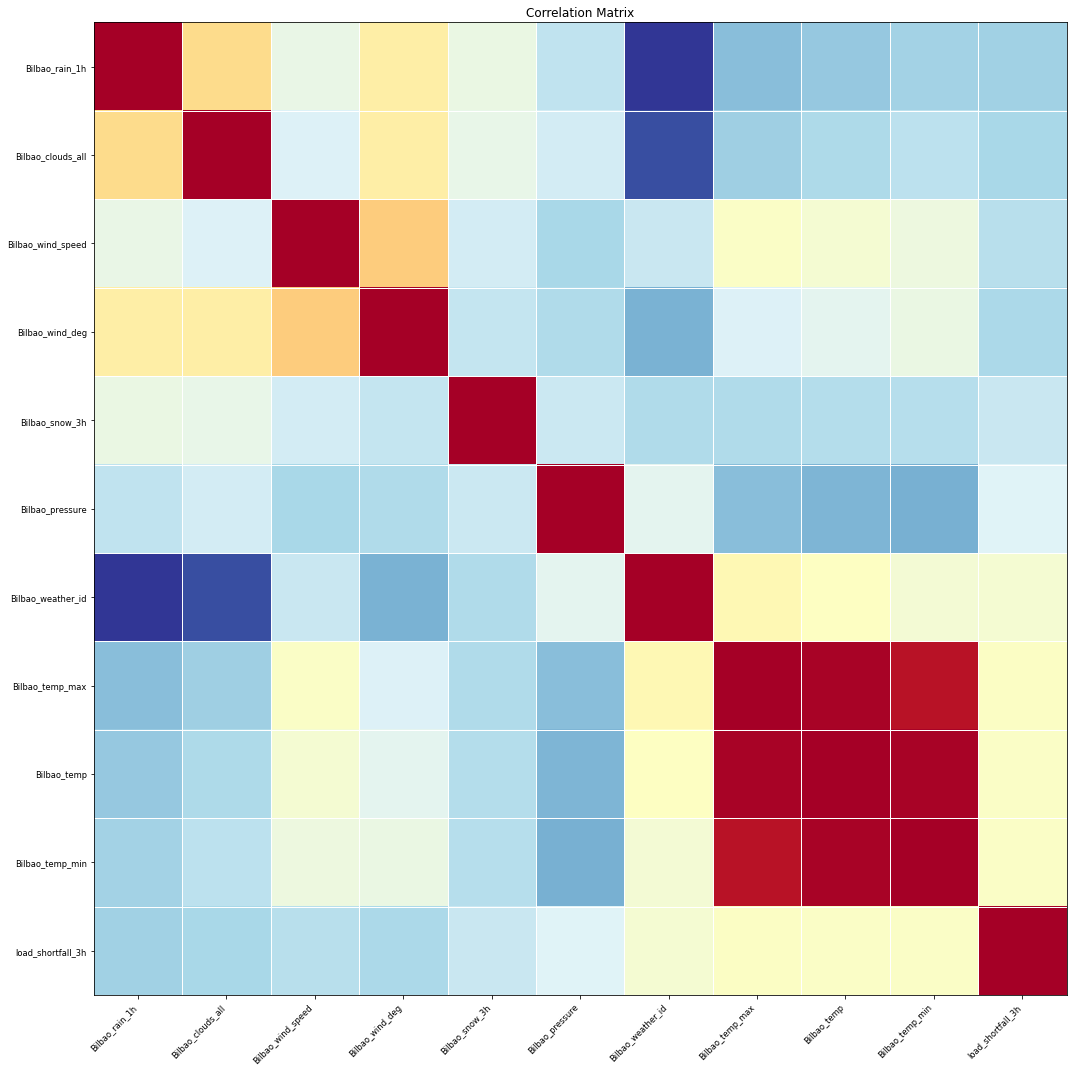

In [27]:
# the correlation heatmap
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(Bilbao_df_dummies.corr(), xnames = Bilbao_df_dummies.corr().columns, ax = ax);

In [28]:
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
dfm = Bilbao_df_dummies.copy()

# The dependent variable:
y_name = 'load_shortfall_3h'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 load_shortfall_3h ~ Bilbao_rain_1h + Bilbao_clouds_all + Bilbao_wind_speed + Bilbao_wind_deg + Bilbao_snow_3h + Bilbao_pressure + Bilbao_weather_id + Bilbao_temp_max + Bilbao_temp + Bilbao_temp_min


In [29]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     73.81
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          7.60e-146
Time:                        15:38:57   Log-Likelihood:                -87089.
No. Observations:                8763   AIC:                         1.742e+05
Df Residuals:                    8752   BIC:                         1.743e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6.789e+04   6759.84

In [31]:
# Calculate correlations between predictor variables and the response variable
corrs = Bilbao_df_dummies.corr()['load_shortfall_3h'].sort_values(ascending=False)

In [32]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
for col in column_titles:
    p_val = round(pearsonr(Bilbao_df_dummies[col], Bilbao_df_dummies['load_shortfall_3h'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
pd.set_option('display.max_rows', df_cp_sorted.shape[0]+1)
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
Bilbao_temp_max,0.180934,0.000000
Bilbao_temp,0.176411,0.000000
Bilbao_temp_min,0.172920,0.000000
Bilbao_weather_id,0.145875,0.000000
Bilbao_wind_speed,-0.081602,0.000000
Bilbao_wind_deg,-0.120800,0.000000
Bilbao_clouds_all,-0.127293,0.000000
Bilbao_rain_1h,-0.152510,0.000000
Bilbao_pressure,0.039052,0.000256
Bilbao_snow_3h,-0.031721,0.002981


In [33]:
# The dependent variable remains the same:
y_data = Bilbao_df_dummies[y_name]  # y_name = 'load_shortfall_3h'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = Bilbao_df_dummies[X_names]

In [37]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

,Bilbao_temp_max,Bilbao_temp,Bilbao_temp_min,Bilbao_weather_id,Bilbao_pressure,Bilbao_snow_3h,Bilbao_wind_speed,Bilbao_wind_deg,Bilbao_clouds_all,Bilbao_rain_1h
Bilbao_temp_max,1.000000,0.981624,0.932219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_temp,0.981624,1.000000,0.982936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_temp_min,0.932219,0.982936,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_weather_id,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_pressure,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Bilbao_snow_3h,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Bilbao_wind_speed,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Bilbao_wind_deg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Bilbao_clouds_all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Bilbao_rain_1h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [39]:
# As before, we create the correlation matrix
# and find rows and columns where correlation coefficients > 0.9 or <-0.9
# corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,Bilbao_temp,Bilbao_temp_min,Bilbao_temp_max,Bilbao_temp_min,Bilbao_temp_max,Bilbao_temp
Bilbao_temp_max,0.981624,0.932219,1.000000,0.932219,1.000000,0.981624
Bilbao_temp_max,0.981624,0.932219,1.000000,0.932219,1.000000,0.981624
Bilbao_temp,1.000000,0.982936,0.981624,0.982936,0.981624,1.000000
Bilbao_temp,1.000000,0.982936,0.981624,0.982936,0.981624,1.000000
Bilbao_temp_min,0.982936,1.000000,0.932219,1.000000,0.932219,0.982936
Bilbao_temp_min,0.982936,1.000000,0.932219,1.000000,0.932219,0.982936


In [41]:
# Lets take a new subset of our potential independent variables
X_remove = ['Bilbao_temp_min', 'Bilbao_temp_max']
X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	load_shortfall_3h ~ Bilbao_temp + Bilbao_weather_id + Bilbao_pressure + Bilbao_snow_3h + Bilbao_wind_speed + Bilbao_wind_deg + Bilbao_clouds_all + Bilbao_rain_1h


In [42]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     78.80
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          2.84e-126
Time:                        15:48:03   Log-Likelihood:                -87139.
No. Observations:                8763   AIC:                         1.743e+05
Df Residuals:                    8754   BIC:                         1.744e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6.414e+04   6733.21

In [44]:
# Separate data into independent (X) and independent (y) variables
X_names = list(Bilbao_df_dummies.columns)
X_names.remove(y_name)
X_data = Bilbao_df_dummies[X_names]
y_data = Bilbao_df_dummies[y_name]

In [45]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

In [46]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

In [47]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
1,Bilbao_clouds_all,0.105945
3,Bilbao_wind_deg,0.080656
6,Bilbao_weather_id,0.037692
8,Bilbao_temp,0.024880
9,Bilbao_temp_min,0.021878
7,Bilbao_temp_max,0.021109
5,Bilbao_pressure,0.020208
2,Bilbao_wind_speed,0.017923
0,Bilbao_rain_1h,0.015615
4,Bilbao_snow_3h,0.000684


In [48]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

,Bilbao_clouds_all,Bilbao_wind_deg,Bilbao_weather_id
0,0.00,0.621521,0.993296
1,0.00,0.615028,0.993296
2,0.00,0.596475,0.993296
3,0.00,0.555659,0.993296
4,0.02,0.514842,0.993296


In [49]:
formula_str = y_name+' ~ '+' + '.join(X_new.columns)
print('Formula:\n\t{}'.format(formula_str))

Formula:
	load_shortfall_3h ~ Bilbao_clouds_all + Bilbao_wind_deg + Bilbao_weather_id


In [50]:
# Fit the model using the model dataframe
model = ols(formula=formula_str, data=Bilbao_df_dummies)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     91.87
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           1.55e-58
Time:                        15:52:04   Log-Likelihood:                -87308.
No. Observations:                8763   AIC:                         1.746e+05
Df Residuals:                    8759   BIC:                         1.747e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          8564.8074    481.36

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

In [52]:
# Get training and testing data for variance threshold model
X_var_train = X_train[X_var_names]
X_var_test = X_test[X_var_names]

In [53]:
# Get training and testing data for correlation threshold model
X_corr_train = X_train[X_corr_names]
X_corr_test = X_test[X_corr_names]

In [54]:
lm = LinearRegression()
lm_corr = LinearRegression()
lm_var = LinearRegression()

In [55]:
lm.fit(X_train, y_train);
lm_corr.fit(X_corr_train,y_train);
lm_var.fit(X_var_train,y_train);

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

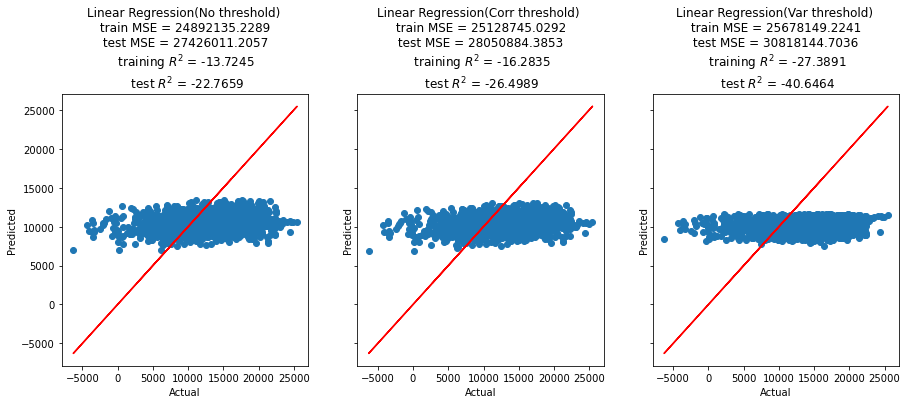

In [57]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
train_pred = [lm.predict(X_train),
              lm_corr.predict(X_corr_train),
              lm_var.predict(X_var_train)]
test_pred = [lm.predict(X_test),
             lm_corr.predict(X_corr_test),
             lm_var.predict(X_var_test)]
title = ['No threshold', 'Corr threshold', 'Var threshold']

# Key:
# No threshold - linear regression with all predictive variables
# Corr threshold - linear regression with correlation thresholded predictive variables
# Var threshold - linear regression with variance thresholded predictive variables


# Loop through all axes to plot each model's results
for i in range(3):
    test_mse = round(mean_squared_error(test_pred[i], y_test), 4)
    test_r2 = round(r2_score(test_pred[i], y_test), 4)
    train_mse = round(mean_squared_error(train_pred[i], y_train), 4)
    train_r2 = round(r2_score(train_pred[i], y_train), 4)
    title_str = f"Linear Regression({title[i]}) \n train MSE = {train_mse} \n " + \
                f"test MSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])

In [ ]:
valencia_df = copy_df[[
                       'Valencia_wind_deg',
                       'Valencia_wind_speed', 
                       'Valencia_snow_3h',
                       'Valencia_pressure',
                       'Valencia_temp_max', 
                       'Valencia_temp',
                       'Valencia_humidity',
                       'Valencia_temp_min', 
                       'load_shortfall_3h']]

In [ ]:
valencia_df.head()

The text data are categorical variables, and get_dummies will transform all the categorical text data into numbers by adding a column for each distinct category. The new column has a 1 for observations which were in this category, and a 0 for observations that were not.

In [ ]:
valencia_df_dummies = pd.get_dummies(valencia_df)

# Again we make sure that all the column names have underscores instead of whitespaces
valencia_df_dummies.columns = [col.replace(" ","_") for col in valencia_df_dummies.columns] 

valencia_df_dummies.head()

In [ ]:
valencia_df_dummies.shape

Let's reorder columns so that our dependent variable is the last column of the dataframe. This will make a heatmap visualisation representing a correlation matrix of our data easier to interpret.

In [ ]:
column_titles = [col for col in valencia_df_dummies.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
valencia_df_dummies=valencia_df_dummies.reindex(columns=column_titles)

In [ ]:
#correlation matrix 
valencia_df_dummies.corr()

In [ ]:
# the correlation heatmap
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(valencia_df_dummies.corr(), xnames = valencia_df_dummies.corr().columns, ax = ax);

We can see from the correlations that it's not be the best idea to keep all of the dummy variables.

Our model will also have collinearity issues:

Valencia_humidity and Valencia_wind_speed are perfectly negative correlated.

Valencia_humidity and Valencia_temp_max, Valencia_temp, Valencia_temp_min are perfectly negative correlated.

Valencia_temp_max and Valencia_temp, Valencia_temp_min are perfectly correlated.

This will likely be a problem when we build a model - let's check what an OLS model summary says.

### Fitting the model using statsmodels.OLS

In [ ]:
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
dfm = valencia_df_dummies.copy()

# The dependent variable:
y_name = 'load_shortfall_3h'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

In [ ]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

We can see that there is a warning about strong multicollinearity. This is likely as a result of the incorrect filtering of one hot encoded dummy variables ( we noticed earlier that Valencia_humidity and Valencia_wind_speed are perfectly negative correlated and Valencia_humidity and Valencia_temp_max, Valencia_temp, Valencia_temp_min are perfectly negative correlated. Also Valencia_temp_max and Valencia_temp, Valencia_temp_min are perfectly correlated ).

In order to ensure that we don't assume an underlying relationship between the categories, we can call pd.get_dummies with the argument drop_first=True so that we only create n-1 columns for each variable with n categories (i.e. one variable/column with five categories will be transformed into four columns of 0's and 1's).

In [ ]:
valencia_df_dummies = pd.get_dummies(valencia_df, drop_first=True)

# Again make sure that all the column names have underscores instead of whitespaces
valencia_df_dummies.columns = [col.replace(" ", "_") for col in valencia_df_dummies.columns]

# Reorder columns with the dependent variable (claim_amount) the last column
column_titles = [col for col in valencia_df_dummies.columns if col !=
                 'load_shortfall_3h'] + ['load_shortfall_3h']
valencia_df_dummies = valencia_df_dummies.reindex(columns=column_titles)

valencia_df_dummies.head()

In [ ]:
valencia_df_dummies.shape

In [ ]:
# We'll keep the model DataFrame, but only specify the columns we want to fit this time
X_names = [col for col in valencia_df_dummies.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+' ~ '+'+'.join(X_names)

# Fit the model using the model dataframe
model = ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

In [ ]:
# Calculate correlations between predictor variables and the response variable
corrs = valencia_df_dummies.corr()['load_shortfall_3h'].sort_values(ascending=False)

In [ ]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
for col in column_titles:
    p_val = round(pearsonr(valencia_df_dummies[col], valencia_df_dummies['load_shortfall_3h'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
pd.set_option('display.max_rows', df_cp_sorted.shape[0]+1)
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

If we were to use a logic test with a significance value of 5% (p-value < 0.05), we could infer that the following features are statistically significant:

In [ ]:
# The dependent variable remains the same:
y_data = valencia_df_dummies[y_name]  # y_name = 'load_shortfall_3h'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = valencia_df_dummies[X_names]

In [ ]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

In [ ]:
# As before, we create the correlation matrix
# and find rows and columns where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

In [ ]:
# Lets take a new subset of our potential independent variables
X_remove = ['Valencia_temp_min']
X_remove = ['Valencia_temp_max']
X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

In [ ]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

### Variable Selection by Variance Thresholds

In [ ]:
# Separate data into independent (X) and independent (y) variables
X_names = list(valencia_df_dummies.columns)
X_names.remove(y_name)
X_data = valencia_df_dummies[X_names]
y_data = valencia_df_dummies[y_name]

In [ ]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

In [ ]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

In [ ]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

In [ ]:
X_new.shape

In [ ]:
# Create Variance Threshold objects
selector_1 = VarianceThreshold(threshold=0.05)
selector_2 = VarianceThreshold(threshold=0.1)
selector_3 = VarianceThreshold(threshold=0.15)

In [ ]:
selector_1.fit(X_normalize)

In [ ]:
selector_2.fit(X_normalize)

In [ ]:
selector_3.fit(X_normalize)

In [ ]:
# Select subset of columns
X_1 = X_normalize[X_normalize.columns[selector_1.get_support(indices=True)]]
X_2 = X_normalize[X_normalize.columns[selector_2.get_support(indices=True)]]
X_3 = X_normalize[X_normalize.columns[selector_3.get_support(indices=True)]]

In [ ]:
# Create figure and axes
f, ax = plt.subplots(figsize=(8, 3), nrows=1, ncols=1)

# Create list of titles and predictions to use in for loop
subset_preds = [X_1.shape[1], X_2.shape[1], X_3.shape[1]]
thresholds = ['0.05', '0.1', '0.15']

# Plot graph
ax.set_title('# of Predictors vs Thresholds')
ax.set_ylabel('# of Predictors')
ax.set_xlabel('Threshold')
sns.barplot(x=thresholds, y=subset_preds)
plt.show()

In [ ]:
# Get column variances
column_variances1 = selector_1.variances_

vars_dict1 = {}
vars_dict1 = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_1.columns, column_variances1)]
df_vars1 = pd.DataFrame(vars_dict1)
df_vars1.sort_values(by='Variance', ascending=False)

In [ ]:
# Get column variances
column_variances2 = selector_2.variances_

vars_dict2 = {}
vars_dict2 = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_2.columns, column_variances2)]
df_vars2 = pd.DataFrame(vars_dict2)
df_vars2.sort_values(by='Variance', ascending=False)

In [ ]:
# Get column variances
column_variances3 = selector_3.variances_

vars_dict3 = {}
vars_dict3 = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_3.columns, column_variances3)]
df_vars3 = pd.DataFrame(vars_dict3)
df_vars3.sort_values(by='Variance', ascending=False)

In [ ]:
# What is our new OLS formula?
formula_str = y_name+' ~ '+' + '.join(X_3.columns)
print('Formula:\n\t{}'.format(formula_str))

In [ ]:
# Fit the model using the model dataframe
model = ols(formula=formula_str, data=valencia_df_dummies)
fitted = model.fit()

print(fitted.summary())

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

In [ ]:
# Get training and testing data for variance threshold model
X_var_train = X_train[X_var_names]
X_var_test = X_test[X_var_names]

In [ ]:
# Get training and testing data for correlation threshold model
X_corr_train = X_train[X_corr_names]
X_corr_test = X_test[X_corr_names]

In [ ]:
lm = LinearRegression()
lm_corr = LinearRegression()
lm_var = LinearRegression()

In [ ]:
lm.fit(X_train, y_train);
lm_corr.fit(X_corr_train,y_train);
lm_var.fit(X_var_train,y_train);

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
train_pred = [lm.predict(X_train),
              lm_corr.predict(X_corr_train),
              lm_var.predict(X_var_train)]
test_pred = [lm.predict(X_test),
             lm_corr.predict(X_corr_test),
             lm_var.predict(X_var_test)]
title = ['No threshold', 'Corr threshold', 'Var threshold']

# Key:
# No threshold - linear regression with all predictive variables
# Corr threshold - linear regression with correlation thresholded predictive variables
# Var threshold - linear regression with variance thresholded predictive variables


# Loop through all axes to plot each model's results
for i in range(3):
    test_mse = round(mean_squared_error(test_pred[i], y_test), 4)
    test_r2 = round(r2_score(test_pred[i], y_test), 4)
    train_mse = round(mean_squared_error(train_pred[i], y_train), 4)
    train_r2 = round(r2_score(train_pred[i], y_train), 4)
    title_str = f"Linear Regression({title[i]}) \n train MSE = {train_mse} \n " + \
                f"test MSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])

In [ ]:
# plot relevant feature interactions

In [ ]:
# evaluate correlation

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic